Assume we observe data that look as below.

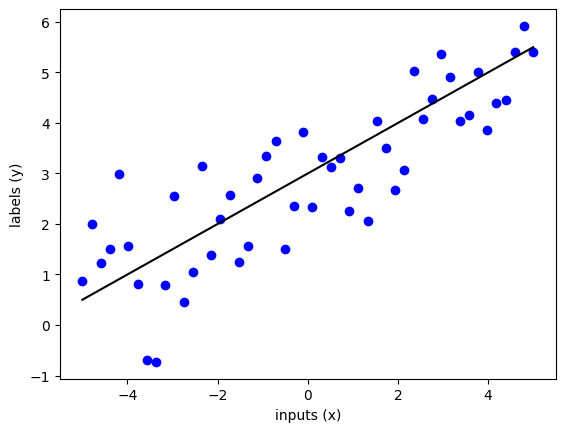

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# This is the true data generating process. 
# We do not have access to this information in a typical machine learning problem
inputs = np.linspace(-5,5,50)        
outputs = inputs*0.5+3 
labels = outputs + np.random.randn(inputs.shape[0])

plt.plot(inputs,labels,'bo')
plt.plot(np.linspace(-5,5,500),
         np.linspace(-5,5,500)*0.5+3,'k-')
plt.xlabel("inputs (x)")
plt.ylabel("labels (y)")
plt.show()

Our visual inspection tells us that there is strong linear correlation between inputs and the outputs. Then let us choose our hypothesis set accordingly:

$\mathcal{H} := \{h: h(x) = w_0 + w_1 x, (w_0,w_1) \in \mathbb{R}^2 \}$.

Denoting $w := (w_0,w_1)$, we can re-express the hypothesis as $h(x) := w^\top x$, where $\top$ indicates a matrix transpose.

Assume we are given a training set $S=\{(x_i, y_i) : i \in [m]\}$. Its mean squared-error loss for our chosen hypothesis $h$ is:

$L_S(w) := \frac{1}{m} \sum_{i \in [m]} (w^\top x_i - y_i)^2$.

Let us perform empirical risk minimization:

$w_S := \arg \min_w L_S(w)$.

The squared error loss gets its minimum value at the point where its derivative is zero. Hence, we can find the solution at $w_S$ that satisfies $\nabla_w L_S(w) \vert_{w := w_S} = 0$, that is

\begin{align*}
\nabla_w L_S(w) &= \frac{1}{m} \sum_{i \in [m]} \Big (  w^\top x_i x_i^\top w - 2 w^\top x_i y_i + y_i^2\Big )\\
   &= \frac{1}{m} \sum_{i \in [m]} \Big ( 2x_i x_i^\top w_S - 2 x_i y_i \Big ) \triangleq 0\\
   \Rightarrow & \sum_{i \in [m]} x_i x_i^\top w_S =  \sum_{i \in [m]} x_i y_i \\
      \Rightarrow &  w_S = \Bigg ( \sum_{i \in [m]} x_i x_i^\top \Bigg )^{-1} \sum_{i \in [m]} x_i y_i \\
\end{align*}

Fitting a linear model on data is often referred to as **least-squares regression** and $w_S$ the **least-squares solution**.

Denote each data point by a column vector $z_i := (x_i, 1)$. Expressing the linear model as $w^\top z_i$ and using the definition of the dot product we have

$w^\top z_i = x_i w_1 + w_0$

where the term $w_0$ is referred to as the **bias**. The bias gives the model the opportunity to shift the predictor to an appropriate position before fitting the line. As we will see later, this flexibility sometimes brings substantial improvement in model fit.

Let us collect all input samples into a $\mathbb{R}^{m \times 2}$ matrix that contains data points on its rows:

\begin{align*}
Z=\begin{bmatrix}
 z_1\\
  \vdots\\
  z_n
\end{bmatrix}
\end{align*}

Let us also collect the corresponding labels in a vector $y := (y_i, \ldots, y_m)$. We can re-express the least-squares solution in vector notation as follows

$w_S :=  (Z^\top Z)^{-1} Z^T y$.

Let us implement it and solve the task.



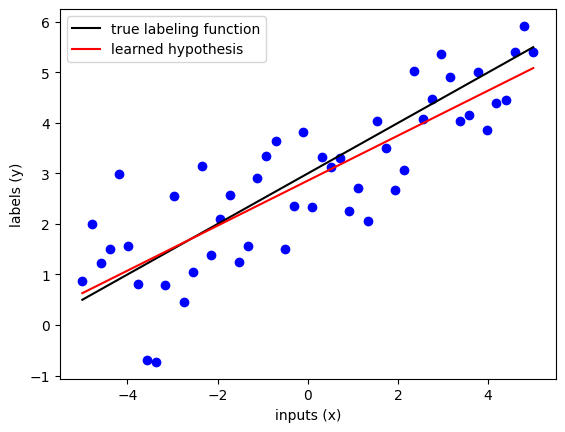

In [65]:
num_samples = inputs.shape[0]
num_train_samples = num_samples 
idx = np.random.permutation(num_samples) 
inputs_train = inputs[idx[:num_train_samples]]
labels_train = labels[idx[:num_train_samples]]

class LinearRegression:
    def __init__(self):
        pass
      
    def extract_features(self, inputs):
        m = inputs.shape[0]
        inputs = np.expand_dims(inputs,axis=1)
        input_features = np.concatenate( (inputs, np.ones([m,1])), axis=1)
        return input_features

    def learn(self, inputs, labels):
        input_features = self.extract_features(inputs)
        # This is where the least-squares solution is implemented!
        XtX_inv = np.linalg.inv(input_features.T.dot(input_features))
        self.weights = XtX_inv.dot(input_features.T).dot(labels)

    def predict(self, inputs):
        input_features = self.extract_features(inputs)
        predictions = input_features.dot(self.weights)
        return predictions

model = LinearRegression() 

model.learn(inputs_train, labels_train) 
predictions = model.predict(np.linspace(-5,5,500))

plt.plot(inputs,labels,'bo')
plt.plot(np.linspace(-5,5,500), 
         np.linspace(-5,5,500)*0.5+3,'k-', 
         label='true labeling function')
plt.plot(np.linspace(-5,5,500), 
         predictions ,'r-', label='learned hypothesis')
plt.legend(loc="upper left")
plt.xlabel("inputs (x)")
plt.ylabel("labels (y)")
plt.show()

## Metric spaces

We would like the vector spaces (such as feature spaces, parameters spaces etc.) used in machine learning to have some plausible properties. We can guarantee the existence of these properties by accompanying a continuous domain $X$ with a distance function $dist: X \times X \rightarrow \mathbb{R}^+$ that is

1. **strict:**  $\forall a, a' \in X, a \neq a' \Rightarrow dist(a,a') > 0$,
2. **reflexive:** $\forall a \in X, \Rightarrow dist(a,a) = 0$,
3. **symmetric:** $\forall a, a' \in X, \Rightarrow dist(a,a') = dist(a',a)$.

We get these properties by assuming these vector spaces to be **metric spaces**, that is vector space that satisfies

 * $\forall a, b, c \in X, dist(a,c) \leq dist(a,b) + dist(b,c)$, which is called the **triangle inequality**.

For $p > 0$, the $L_p$-norm of a vector $u$ is defined as follows

$|| u ||_p = \Big ( \sum_{j=1}^k |u_j|^p \Big )^{1/p}$.

If $p=2$, we get the well-known **Euclidean norm**.

If $p=1$, we get the **Manhattan norm**.

As $p \rightarrow \infty$, we tend to get the **Maximum norm** ($L_\infty$), i.e. $||u||_\infty := \max \{|u_1|, \ldots, |u_d|\}$.

We can use this norm to derive many nice metric spaces

$dist(a,b) = ||a-b||_p$.

Let us plot the behavior of these distances as a function of $P$. The red lines below are iso-contours of $||a_1 - a_2||_p=1$ for different choices of $p$. As $p \rightarrow 0$, the norms get more conservative.

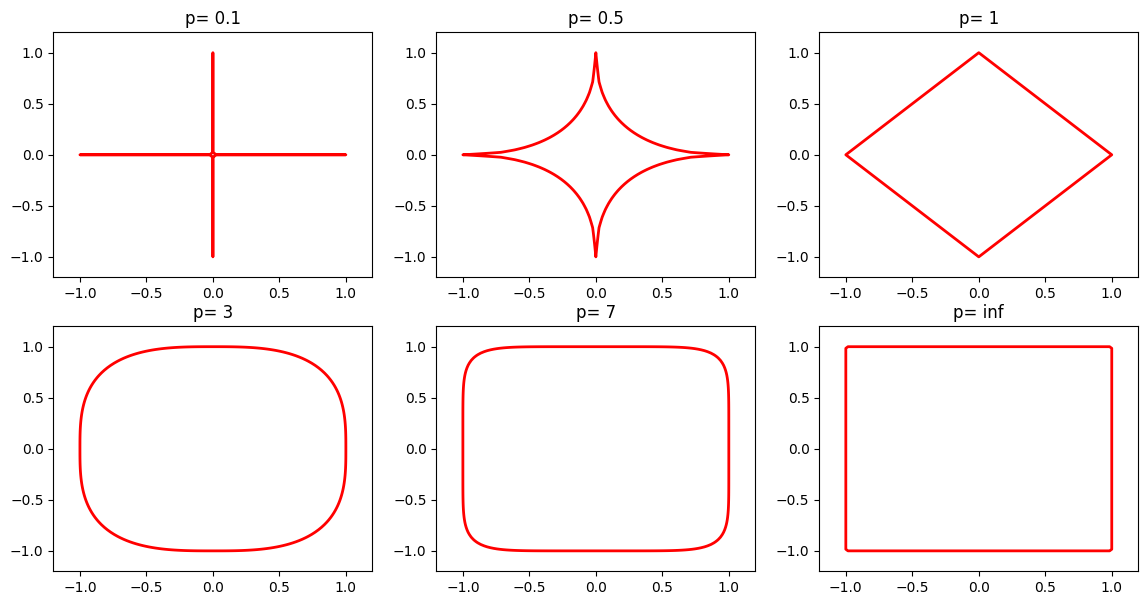

In [66]:
p_values = [0.1, 0.5, 1, 3, 7, np.inf]
a1, a2 = np.meshgrid(np.linspace(-1.2, 1.2, num=101), 
                     np.linspace(-1.2, 1.2, num=101))
fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                     nrows=2, figsize=(14, 7))
for p, ax in zip(p_values, axes.flat):
    if p == 0:
        zz = (a1 != 0).astype(int) + (a2 != 0).astype(int)
        ax.imshow(zz, cmap='bwr', extent=(xx.min(),xx.max(),
                      a2.min(),a2.max()), aspect="auto")
    else:
        if np.isinf(p):
            zz = np.maximum(np.abs(a1),np.abs(a2))
        else:
            zz = ((np.abs((a1))**p) + (np.abs((a2))**p))**(1./p)
        ax.contour(a1,a2,zz, [1], colors='red', linewidths = 2)
        ax.set_title("p= {0}".format(p))       

plt.show()

## Regularized least squares

We have seen in Lecture 1 that $L_S(h_S)=0$ can be achieved by memorizing the training set, resulting in overfitting. Let us then assume a hypothesis space $H$ of finite size $|H|$ and devise a loss function that aims for the dual goals of fitting to data as well as possible and constraining model complexity concurrently:

$h_S := \arg \min_{h \in H} L_S(h)+\lambda |H|$.

Here $\lambda$ is called a **regularization coefficient** and the term $|H|$  a **regularizer**. As we will see in more detail later, this paradigm is called **Structured Risk Minimization**, one of the biggest achievements of machine learning research in the pre-deep-learning era.

Let us next apply the idea of constraining the hypothesis space to the least squares problem:

$h_S := \arg \min_w \frac{1}{m} \sum_{i \in [m]} (w^\top x_i - y_i)^2$

$\text{s.t.}~~||w||_p \leq \eta$

where the abbreviation $\text{s.t.}$ stands for **subject to**, meaning that we search for a solution within a feasible set of parameters $\{ w :  ||w||_p \leq \eta\}$. This constrained optimization problem can be expressed equivalently as:

$h_S := \arg \min_w \max_\lambda \frac{1}{m} \sum_{i \in [m]} (w^\top x_i - y_i)^2 + \lambda (||w||_p^p - \eta)$

where $\lambda > 0$. We do not have an analytical solution to this problem for arbitrary $p$. By choosing a large $\lambda$ and dropping the inner $\max$ problem, we can find a reasonable approximation referred to as **regularized least squares**:

$h_S := \arg \min_w  \frac{1}{m} \sum_{i \in [m]} (w^\top x_i - y_i)^2 + \lambda ||w||_p^p$.

The special case of $p=2$ deserves detailed investigation:

$h_S := \arg \min_w \frac{1}{m} \sum_{i \in [m]} (w^\top x_i - y_i)^2 + \lambda ||w||_2^2$.

We can rewrite the loss of this optimization in vector form as:

$L_S(w) := \frac{1}{m} (Z w-y)^2 + \lambda w^\top w$.

Let us find the optimal weights that minimize the loss by setting its gradient to zero once again:

\begin{align*}
L_S(w) &= \frac{1}{m} w^\top Z^\top Zw - \frac{1}{m} 2 w^\top Z^\top y + \lambda w^\top w\\
  &= w^\top \left (\frac{1}{m} Z^\top Z + \lambda I \right )w - \frac{2}{m} w^\top Z^\top y\\
  \Rightarrow & \nabla_w L_S(w) = 2\left(\frac{1}{m} Z^\top Z + \lambda I \right )w - \frac{2}{m} Z^\top y := 0\\
  \Rightarrow & w_S = \left(\frac{1}{m} Z^\top Z + \lambda I \right )^{-1} Z^\top y.
\end{align*}

The result, known as **ridge regression** differs from the least-squares solution by only the term in red. Such methods that induce sparse solutions by eliminating parameters that do not contribute to the prediction of the target quantity are known in statistics as **parameter shrinkage** methods. The regularizer of ridge regression is referred to as **weight decay**. The name is still in active use by some recent deep learning libraries.

Let us next see ridge regression in action.


In [67]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

class RidgeRegression:
    def __init__(self, n_dims):
        pass

    def extract_features(self, inputs):
        m = inputs.shape[0]
        input_features = np.concatenate( (inputs, np.ones([m,1])), axis=1)
        return input_features
      
    def learn(self, inputs, labels, lambda_coef=0.1):
        input_features = self.extract_features(inputs)
        XtX_inv = np.linalg.inv(input_features.T.dot(input_features) \
                    +lambda_coef*np.eye(input_features.shape[1]))
        self.weights = XtX_inv.dot(input_features.T).dot(labels)

    def predict(self, inputs):
        input_features = self.extract_features(inputs)
        predictions = input_features.dot(self.weights)
        return predictions



This time we work on the Diabetes data set that consists of 442 data points. Each data point represents a patient with the following 10 features:

  1. age
  2. sex
  3. body-mass index
  4. average blood pressure
  5. total serum cholesterol
  6. low-density lipoprotein level
  7. high-density lipoprotein level
  8. total cholesterol level
  9. possibly log of serum triglycerides level
  10. blood sugar level

The goal is to predict a quantitative progression of disease progression, the higher the more severe.

In [68]:
d = load_diabetes()
df = pd.DataFrame(d.data, columns=d.feature_names)
df['disease'] = d.target
#df.head(3)
n = len(df)
X = df.drop('disease',axis=1).values
y = df['disease'].values
# This is a nice scikit-learn function
X_train, X_test, y_train, y_test = \
         train_test_split(X, y, test_size=0.20) # hold out 20%

print("Means:")
print(X_train.mean(axis=0))
print("Variances:")
print(X_train.var(axis=0))


Means:
[ 1.25657902e-03  9.93991359e-04  6.36473223e-04  1.09763630e-04
 -1.73517545e-04 -7.15524346e-04 -5.03427266e-05 -1.08172036e-03
  1.20108175e-03  9.99222964e-04]
Variances:
[0.0022559  0.00226746 0.00235724 0.00230773 0.00224264 0.00219264
 0.0021665  0.00209198 0.0022746  0.00218008]


Notably, different features have different scales. This may cause artifacts in model fitting, such as prioritization of features according to their scales instead of their relevance to the predicted quantity of interest. We can mitigate these artifacts by **normalizing** the data. One commonplace approach is **z-score normalization**, which assumes that each feature is normal distributed with some mean $\mu$ and variance $\sigma^2$. That is, each dimension $x_d$ of a $D-$dimensional observation $x$ comes from a sampling process as below:

$\epsilon \sim N(0,1),$
$x_d = \mu_d + \sigma_d \epsilon$.

This operation make the assumption that all the observed differences across individual results (called factors of variation) stem from the first step, i.e. a sample from a standard normal distribution. The second step scales and shifts this sample. Z-score normalization reverses the second operation to bring all features to the first step:

$x'_d := \dfrac{x_d - \mu_d}{\sigma_d}, \forall d \in [D]$.

For $\mu_d$ and $\sigma_d$, we use the sample mean and standard deviation of the corresponding feature. This preprocessing step is also referred to as **standardization**. We will revisit its probability-theoretic justification later.

In [69]:
# z-score normalization
m = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
X_train = (X_train-m)/std
X_test = (X_test-m)/std

print("Means:")
print(X_train.mean(axis=0))
print("Variances:")
print(X_train.var(axis=0))

Means:
[ 1.82416248e-17  2.39342697e-16 -7.54825852e-17  1.06933662e-17
 -4.05718896e-17 -8.75912500e-17 -1.57255386e-17  9.74983393e-17
 -1.57255386e-17  1.10078770e-17]
Variances:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now we are ready to train and test ridge regression on the Diabetes data set.

In [70]:
model_ridge = RidgeRegression(n_dims=X_train.shape[1])

model_ridge.learn(X_train, y_train, lambda_coef=1)

predictions = model_ridge.predict(X_train)
train_error = np.sqrt(((predictions - y_train)**2).mean())
print("Train RMSE: {:.2f}".format(train_error))

predictions = model_ridge.predict(X_test)
test_error = np.sqrt(((predictions - y_test)**2).mean())
print("Test RMSE: {:.2f}".format(test_error))

Train RMSE: 53.13
Test RMSE: 56.00


We have a decent result. But can we do even better? Can we sparsify our method even further? Inspired by the properties of metric spaces illustrated above, we can next try out $p=1$. For $D$ dimensional input vectors $x_i$, the resulting loss function reads:

$L_S(w) := \frac{1}{m} \sum_{i \in [m]} (w^\top x_i - y_i)^2 + \lambda \sum_{j=0}^D |w_j|$.

This approach is known as **Least Absolute Shrinkage Selection Operator (LASSO) Regression** (R. Tibshirani, 1996).

Unlike ridge regression and least squares, the Lasso loss does not have an analytical solution. That is, no analytical formula exists to calculate a $w$ that would satisfy

$\nabla_w \Big ( \frac{1}{m}  \sum_{i \in [m]} (w^\top x_i - y_i)^2 + \lambda \sum_{j=0}^D |w_j| \Big ) := 0$.

If we cannot go straight to the value that minimizes the loss, we can instead find its direction and take a step towards there. Remember that the derivative of a function points to the direction towards which a function grows. Then negating it should point us towards a neighboring position with lower loss than our current position. It is reasonable to hope that repetitively taking small steps towards a neighboring point with lower loss will bring us to the point where the loss is minimum. Consider a series $w_0, w_1, \ldots$ created by the following succesion rule and some arbitrary initialization $w_0$:

$w_{t+1} := w_t - \alpha \nabla_w L_S(w) \vert_{w:=w_t}$

This approach is called **gradient descent**. It is in use with nearly all modern machine learning approaches. The coefficient $\alpha>0$ is called a **learning rate**. It determines how fast the model parameters will change in a single iteration. Too large a learning rate may result in missing the optimal solution due to large oscillations around it. Too small a learning rate may result in infeasibly long training time.

Gradient descent requires repetitive evaluation of the gradient of the loss with respect to the parameters at every iteration: $L_S(w) \vert_{w:=w_t}$. Hence its implementation on the computer requires an analytical calculation of this gradient. This may be time consuming for complex loss functions. Deep learning libraries such as PyTorch and TensorFlow allow us to automate this process. See an example PyTorch implementation of Lasso regression below.

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 14.8 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [torch]32m3/4 [torch]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 14.8 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [torch]32m3/4 [torch]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


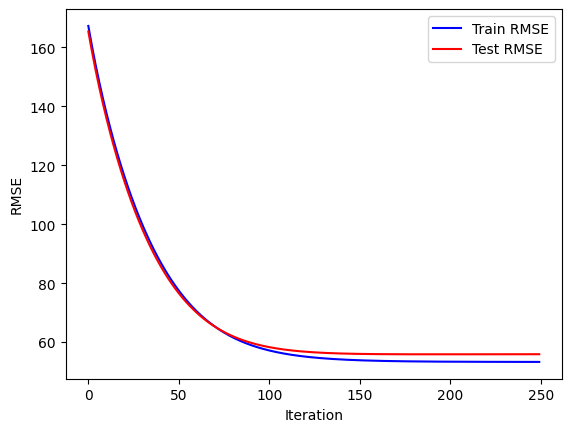

In [ ]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F
import torch.optim

class LassoRegression(nn.Module):
    def __init__(self, n_dims, lambda_coef=1):
        super(LassoRegression, self).__init__()
        self.lambda_coef = lambda_coef
        self.emp_risk = nn.MSELoss()
        self.weight = nn.Parameter(th.randn((n_dims,1)))
        self.bias = nn.Parameter(th.randn((1)))

    def predict(self, input):
        return input @ self.weight + self.bias

    def learn(self, inputs, labels, num_steps=1):
        # The in-built Stochastic Gradient Descent optimizer
        # The argument "lr" sets the learning rate
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        for ii in  range(num_steps):
            # Predict with the current weight values
            # This step is called a "forward pass"
            predictions = self.predict(inputs)
            loss =  ((predictions - labels)**2).mean() \
                    + self.weight.abs().sum()*self.lambda_coef
            # Clear the gradient values remaining from 
            # the previous iteration
            optimizer.zero_grad()
            # Compute the new gradient values
            # This step is called the "backward pass"
            loss.backward()
            # Take the gradient descent step
            optimizer.step()


# Convert data into the Torch format
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().reshape(-1,1)
y_test = torch.tensor(y_test).float().reshape(-1,1)

# z-score normalization
m = th.mean(X_train,axis=0)
std = th.std(X_train,axis=0)
X_train = (X_train-m)/std
X_test = (X_test-m)/std

# Train our model
model_lasso = LassoRegression(n_dims=X_train.shape[1], lambda_coef=1)
model = LogisticRegression(input_dim=5)
# Number of gradient descent iterations
num_iterations = 250

# Collect the train and test errors here.
train_errors = np.zeros(num_iterations)
test_errors = np.zeros(num_iterations)

for ii in  range(num_iterations):
    model_lasso.learn(X_train, y_train)

    predictions = model_lasso.predict(X_train)
    train_error = ((predictions - y_train)**2).mean().sqrt()
    train_errors[ii] = train_error.detach().numpy()

    # Test our model
    predictions = model_lasso.predict(X_test)
    test_error = ((predictions - y_test)**2).mean().sqrt()
    test_errors[ii] = test_error.detach().numpy()

# Plot the learning curve
plt.plot(np.arange(num_iterations),train_errors,'b-', label="Train RMSE")
plt.plot(np.arange(num_iterations),test_errors,'r-', label="Test RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.show()

The figure above is called the **learning curve**. It depicts the evolution of model performance throughout the learning process. 

**REMARK:** Learning curves give plenty of information about the model behavior. Hence, plotting and visually inspecting them facilitates debugging.

Let us next see how much shrinkange we gained from the Lasso and ridge regression regularizers. As visible below, Lasso sparsifies the parameters more than ridge.

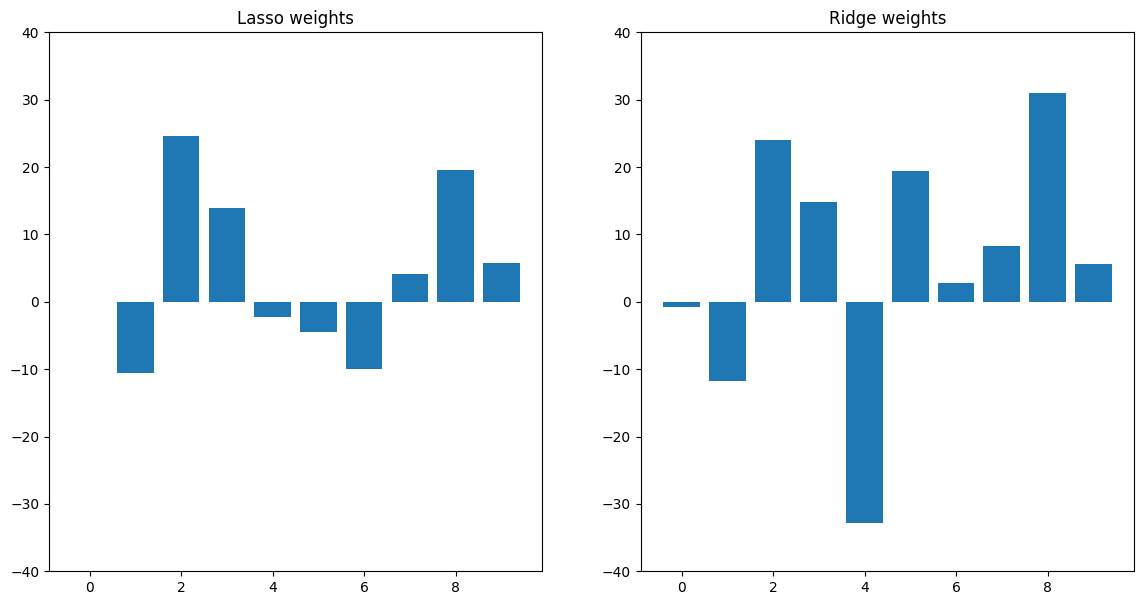

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 7))

axes[0].bar(np.arange(X_train.shape[1]), 
            model_lasso.weight.view(-1).detach().numpy())
axes[0].set_ylim(-40,40)
axes[0].set_title("Lasso weights")
axes[1].bar(np.arange(X_train.shape[1]), 
            model_ridge.weights[:10].squeeze())
axes[1].set_ylim(-40,40)
axes[1].set_title("Ridge weights")
plt.show()
